In [2]:
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.offline as pyoff
import matplotlib.pyplot as plt
import plotly.offline as pyoff
import plotly.graph_objs as go
from datetime import datetime, timedelta
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from platform import python_version

In [ ]:
pd.set_option('display.precision', 3)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.min_rows', 40)
pd.set_option('display.date_dayfirst',True)

In [3]:
# Carregamento do arquivo

dataset = pd.read_csv('D:/Google Drive/portfolioDS/mbasket_analytics/data/retail.csv', header = 0, encoding = 'unicode_escape')

In [4]:
dataset

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,Brasil
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Brasil
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Brasil
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Brasil
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Brasil
...,...,...,...,...,...,...,...,...
541795,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,Uruguai
541796,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,Uruguai
541797,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,Uruguai
541798,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,Uruguai


In [5]:
dataset.columns

Index(['NumeroFatura', 'CodigoProduto', 'NomeProduto', 'Quantidade',
       'DataVenda', 'ValorUnitario', 'IdCliente', 'Pais'],
      dtype='object')

In [6]:
dataset.describe()

,Quantidade,ValorUnitario,IdCliente
count,541800.000000,541800.000000,406725.000000
mean,9.551739,4.611581,15287.754038
std,218.103033,96.769576,1713.475925
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541800 entries, 0 to 541799
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NumeroFatura   541800 non-null  object 
 1   CodigoProduto  541800 non-null  object 
 2   NomeProduto    540346 non-null  object 
 3   Quantidade     541800 non-null  int64  
 4   DataVenda      541800 non-null  object 
 5   ValorUnitario  541800 non-null  float64
 6   IdCliente      406725 non-null  float64
 7   Pais           541800 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
dataset.isnull().sum()

NumeroFatura          0
CodigoProduto         0
NomeProduto        1454
Quantidade            0
DataVenda             0
ValorUnitario         0
IdCliente        135075
Pais                  0
dtype: int64

In [12]:
dataset['Faturamento'] = dataset['Quantidade'] * dataset['ValorUnitario']

In [17]:
dataset[['Pais','Faturamento']].groupby(['Pais']).sum()

,Faturamento
Pais,
Alemanha,2.213826e+05
Australia,1.370773e+05
Austria,1.015432e+04
Bahrain,5.484000e+02
Belgium,4.091096e+04
Brasil,8.185722e+06
Canada,3.666380e+03
Channel Islands,2.008629e+04
Chile,1.291750e+03


<AxesSubplot:xlabel='Pais'>

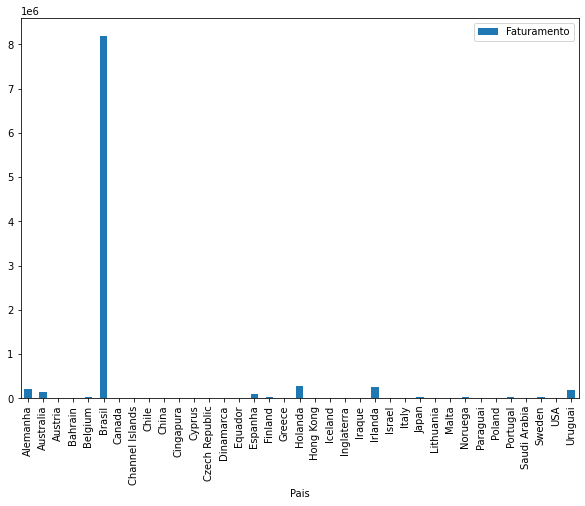

In [20]:
dataset[['Pais','Faturamento']].groupby(['Pais']).sum().plot(kind='bar', figsize=(10,7))